In [144]:
# Select one molecule from each cluster color
selected_molecules = {color: molecules[0] for color, molecules in color_dict.items()}

# Draw molecules for each cluster color
mols = []
titles = []
for color, mol_name in selected_molecules.items():
    mol = next((m for m in list_mol if m.GetProp('_Name') == mol_name), None)
    if mol:
        mols.append(mol)
        titles.append(f"{mol_name} ({color})")

# Display the selected molecules
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=titles) 


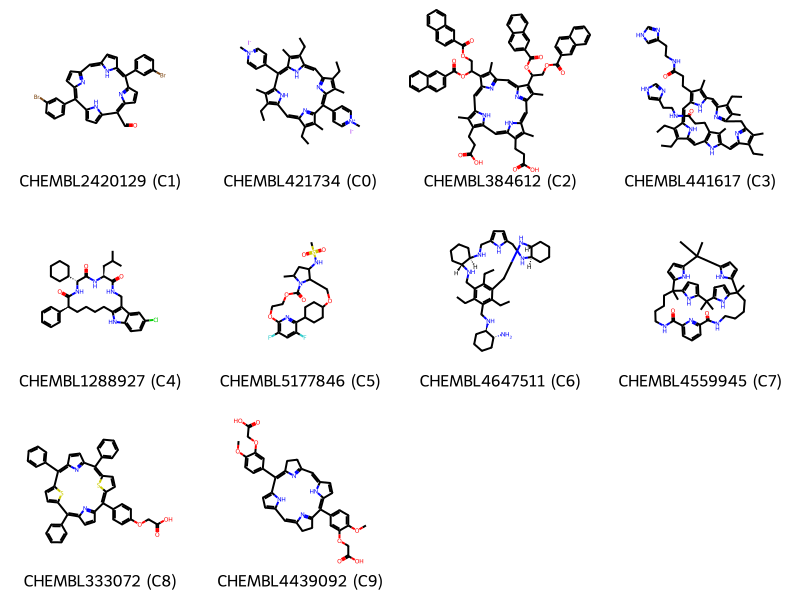

In [145]:
img

In [136]:
# Select five molecules from first two clusters

# Select 5 molecules from C1 and C2 clusters
selected_molecules = {
    "C1": color_dict.get("C1", [])[:5],  # Select first 5 molecules from C1
    "C2": color_dict.get("C2", [])[:5] ,  # Select first 5 molecules from C2
    "C3": color_dict.get("C3", [])[:5]   # Select first 5 molecules from C2
}

# Get molecule objects for selected SMILES
mols = []
titles = []
for color, mol_names in selected_molecules.items():
    for mol_name in mol_names:
        mol = next((m for m in list_mol if m.GetProp('_Name') == mol_name), None)
        if mol:
            mols.append(mol)
            titles.append(f"{mol_name} ({color})")

# Display the selected molecules
img2 = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=titles)



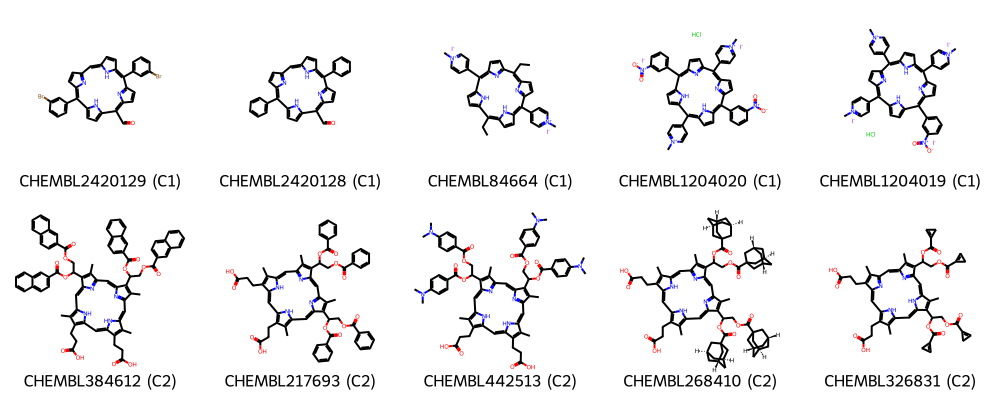

In [82]:
img2

In [83]:
# This will give us the clusters in order as the last plot
new_data=list(reversed(o['ivl']))

# we create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]

[]

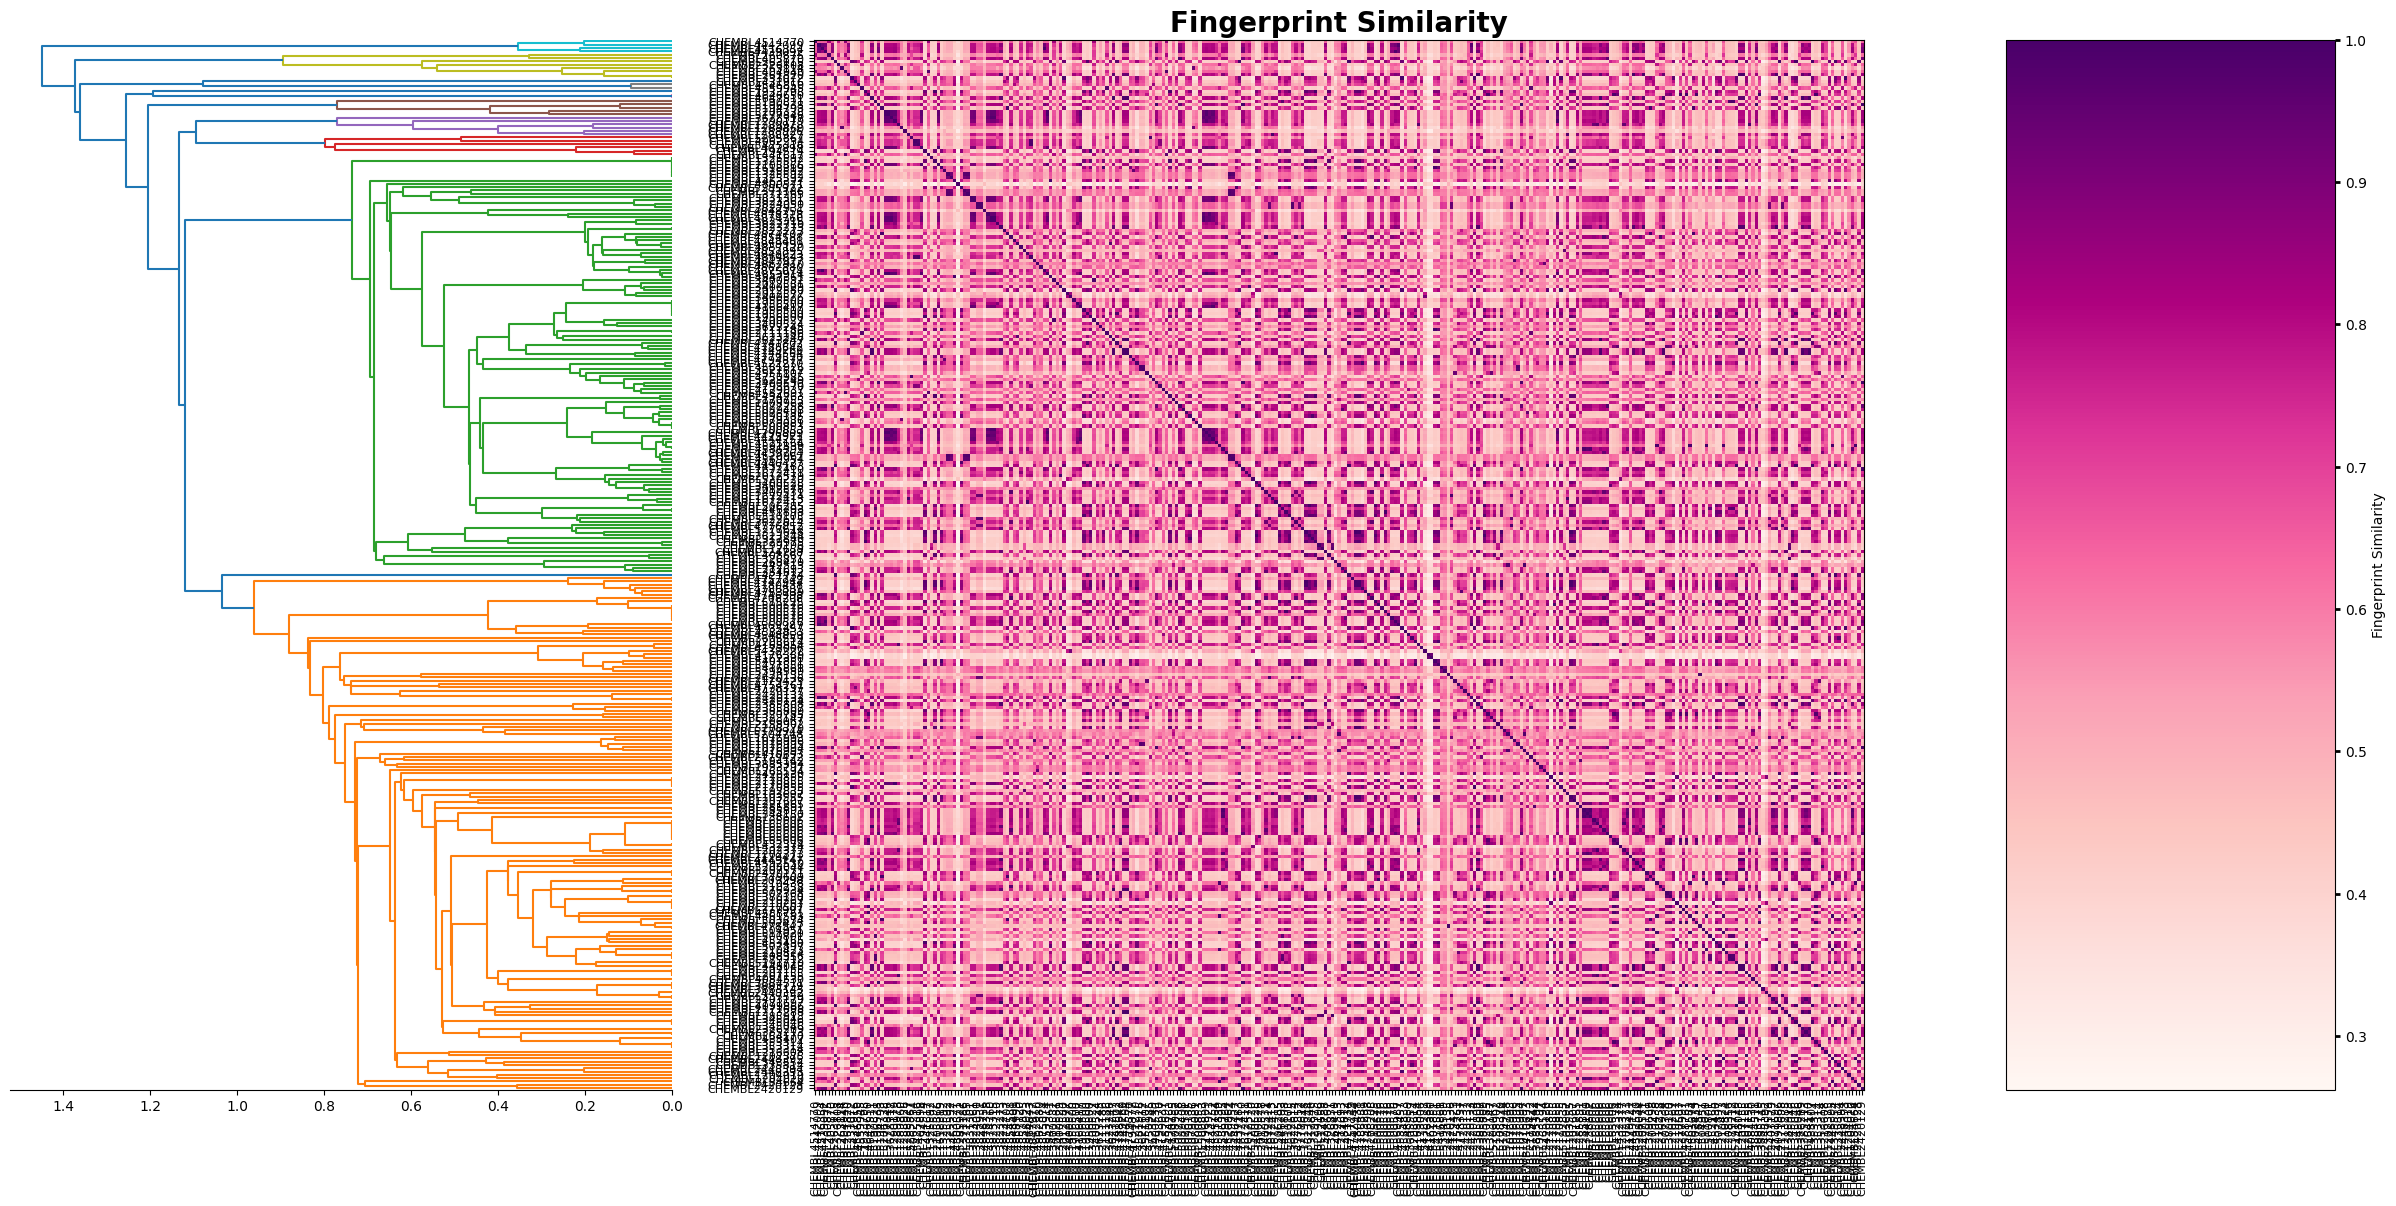

In [85]:
figure= plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(gs1[0:-1,2:6])
f=ax2.imshow (hmap, cmap='RdPu', interpolation='nearest')

ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.set_xticks (range(len(new_data)))
ax2.set_yticks (range(len(new_data)))
ax2.set_xticklabels (new_data,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)

ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')

plt.tick_params ('both',width=2)
plt.grid(False)
plt.plot()
plt.savefig('hcl.png', dpi=600)
[]

# Murcko Fragments

In [94]:
def find_terminal_atoms(mol):
    
    """ 
    This function finds terminal atoms in the structure.
    
    Args:
        mol: Mol objects 
    """
    strt = []
    for a in mol.GetAtoms():
        if len(a.GetBonds()) == 1:
            strt.append(a)
    return strt

In [95]:
def top20Frequent(a):
    """ 
    This function is to assess top 20 most frequent Murcko fragments seen in the list.
 
    Args:
        a: Smile of Murcko fragment 
        
    Returns:
        Giving the 20 most frequent Murcko fragments.
    """
    freq = {}
    for num in a:
        if num in freq and len(num)>1:
            freq[num] = freq[num] + 1
        else:
            freq[num] = 1
    collection = collections.defaultdict(list)
    for e in freq:
        f = freq[e]
        collection[f].append(e)
    res = []
    count = len(a)  # the upper limit for res
    while len(res) < 10:
        if collection[count]:
            res += collection[count]
        count -= 1
    return res

In [96]:
def draw_top20Frequent(sol,counting,smis):
   
    """ 
    This function draws the 20 most seen structures, legends show how many times do they appear in the list 
  
    Args:
        sol: Smile list of top 20 most frequent Murcko fragments seen in a list
        counting: Counts number of occurences of the structures in the list
        smis: MolFromSmiles to count frequencies
        v_f: Calculation of frequencies
        ls_str: String version of frequencies to make them labels
        
    Returns:
        Structure images are given with their frequencies
        
    """
  
    smis= [Chem.MolFromSmiles(solut) for solut in sol] #Chem.MolFromSmiles of Murcko fragments to depict them in images
    for mol in smis:
        rdDepictor.Compute2DCoords(mol) 
    v_f=[counting[x] for x in sol]
    ls_str = [str(x) for x in v_f]
    drawing=Draw.MolsToGridImage(smis[:5],legends=ls_str[:5],subImgSize=(250,250),molsPerRow=5,returnPNG=False)
    return drawing

# MurckoScaffold 

In [97]:
# Getting Scaffold structures using MurckoScaffold function from Rdkit
list_MurckoScaffold=[]
for mol in list_mol:
    if mol:
        core_2 =Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol))
        list_MurckoScaffold.append(core_2)
print(list_MurckoScaffold[0:3])

['O=C(OCC(OC(=O)C12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3)C1=Cc2cc3ccc(cc4ccc(cc5nc(cc1n2)C=C5C(COC(=O)C12C[C@H]5C[C@@H](C1)C[C@@H](C2)C5)OC(=O)C12C[C@H]5C[C@@H](C1)C[C@@H](C2)C5)[nH]4)[nH]3)C12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3', 'C1=Cc2cc3ccc(cc4nc(cc5ccc(cc1n2)[nH]5)CC4)[nH]3', 'C1=Cc2cc3ccc(cc4nc(cc5ccc(cc1n2)[nH]5)CC4)[nH]3']


In [98]:
#Calculating frequencies of General Murcko Fragments; how many times do they occur in the list?
count_scaff = {}
for n in list_MurckoScaffold:
    count_scaff[n] = count_scaff.get(n, 0) + 1

In [99]:
# Getting Smiles of top 20 most frequent Murcko Scaffolds
solution_MurckoScaffold= top20Frequent(list_MurckoScaffold)
print(solution_MurckoScaffold[0:3])

['C1=Cc2nc1c(-c1ccccc1)c1ccc([nH]1)c(-c1ccccc1)c1nc(c(-c3ccccc3)c3ccc([nH]3)c2-c2ccccc2)C=C1', 'C1=Cc2cc3ccc(cc4nc(cc5ccc(cc1n2)[nH]5)CC4)[nH]3', 'O=C1Cc2c3nc(cc4ccc(cc5nc(cc6cc1c2[nH]6)C=C5)[nH]4)CC3']


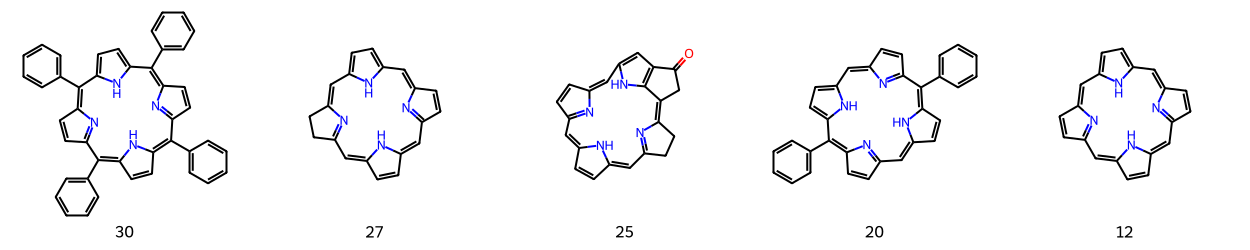

In [100]:
draw_top20Frequent(solution_MurckoScaffold,count_scaff,list_MurckoScaffold)

In [161]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Porphyrin DataFrame'in SMILES ve pIC50 sütunları
smiles_list = porph["Smiles"].tolist()
pIC50_list = porph["pIC$_5$$_0$"].tolist()

# Molekülleri RDKit formatına çevir


# Murcko Scaffold'larını hesapla
murcko_dict = {}
for mol, pIC50 in zip(list_mol, pIC50_list):
    if mol:
        murcko_smi = Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol))
        if murcko_smi not in murcko_dict:
            murcko_dict[murcko_smi] = []
        murcko_dict[murcko_smi].append(pIC50)

# En sık görülen Murcko iskeletlerini al
solution_MurckoScaffold = top20Frequent(list(murcko_dict.keys()))

# İlk 3 Murcko Scaffold’un pIC50 aralıklarını bul
murcko_pIC50_ranges = {}
for scaffold in solution_MurckoScaffold[:5]:
    if scaffold in murcko_dict:
        min_pIC50 = min(murcko_dict[scaffold])
        max_pIC50 = max(murcko_dict[scaffold])
        murcko_pIC50_ranges[scaffold] = (min_pIC50, max_pIC50)

# Sonucu yazdır
print(murcko_pIC50_ranges)


{'O=C(OCC(OC(=O)C12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3)C1=Cc2nc1cc1nc(cc3ccc(cc4ccc(c2)[nH]4)[nH]3)C(C(COC(=O)C23C[C@H]4C[C@@H](C2)C[C@@H](C3)C4)OC(=O)C23C[C@H]4C[C@@H](C2)C[C@@H](C3)C4)=C1)C12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3': (5.0, 5.0), 'C1=Cc2cc3ccc(cc4CCc(n4)cc4ccc(cc1n2)[nH]4)[nH]3': (2.3, 10.64), 'C1=Cc2nc1cc1nc(cc3ccc(cc4ccc(c2)[nH]4)[nH]3)C=C1': (7.49, 9.4), 'C1=Cc2cc3c(/C=C/c4ccc5ccccc5n4)cc(cc4CCc(n4)cc4ccc(cc1n2)[nH]4)[nH]3': (9.34, 9.34), 'C1=Cc2nc1c(-c1cc[nH+]cc1)c1nc(c(-c3cc[nH+]cc3)c3ccc([nH]3)c(-c3cc[nH+]cc3)c3ccc(c2-c2cc[nH+]cc2)[nH]3)C=C1': (0.0, 9.89)}


In [151]:
len(list_murcko_mol)

317

In [152]:
pIC50_values = df_with_200_descriptors['pIC$_5$$_0$'].tolist()

In [156]:
min(df_with_200_descriptors['pIC$_5$$_0$']) # min pCI50 value in db

1.9

In [157]:
max(df_with_200_descriptors['pIC$_5$$_0$'])

10.4

# Bemis Murcko

In [102]:
def BemisMurckoFramework(mol):
    """ 
    This function removes hydrogen and terminal R groups from the structure to obtain General Murcko Framework.
    It also switches all non single bonds with single bonds. 
    
    Args:
        mol: Mol objects 
        
    Returns:
        Giving mol objects after General Murcko fragmentation.
    """
    Chem.Kekulize(mol)
    only_HA = rdkit.Chem.rdmolops.RemoveHs(mol) # keep only Heavy Atoms (HA)
    rw_mol = Chem.RWMol(only_HA) # switch all HA to Carbon
    for i in range(rw_mol.GetNumAtoms()):
        rw_mol.ReplaceAtom(i, Chem.Atom(6))
    non_single_bonds = []  # switch all non single bonds to single
    for b in rw_mol.GetBonds():
        if b.GetBondType() != Chem.BondType.SINGLE:
            non_single_bonds.append(b)
    for b in non_single_bonds:
        j = b.GetBeginAtomIdx()
        k = b.GetEndAtomIdx()
        rw_mol.RemoveBond(j, k)
        rw_mol.AddBond(j, k, Chem.BondType.SINGLE)
    
    terminal_atoms = find_terminal_atoms(rw_mol) # as long as there are terminal atoms, remove them
    while terminal_atoms != []:
        for a in terminal_atoms:
            for b in a.GetBonds():
                rw_mol.RemoveBond(b.GetBeginAtomIdx(), b.GetEndAtomIdx())
            rw_mol.RemoveAtom(a.GetIdx())
        terminal_atoms = find_terminal_atoms(rw_mol)
    return rw_mol.GetMol()

In [103]:
#Smiles of bemis Murcko Fragments
List_Bemis_Murcko=[]
for n in list_mol:
    if n:
        List_Bemis_Murcko.append(Chem.MolToSmiles(BemisMurckoFramework(n), kekuleSmiles=True))
print(List_Bemis_Murcko [0:3])

['C(CC(CCC12CC3CC(CC(C3)C1)C2)C1CC2CC3CCC(CC4CCC(C4)CC4CC(CC1C2)CC4C(CCCC12CC4CC(CC(C4)C1)C2)CCC12CC4CC(CC(C4)C1)C2)C3)CC12CC3CC(CC(C3)C1)C2', 'C1CC2CC1CC1CCC(C1)CC1CCC(C1)CC1CCC(C1)C2', 'C1CC2CC1CC1CCC(C1)CC1CCC(C1)CC1CCC(C1)C2']


In [104]:
#Calculating frequencies of General Murcko Fragments; how many times do they occur in the list?
count_Bemis = {}
for n in List_Bemis_Murcko:
    count_Bemis[n] = count_Bemis.get(n, 0) + 1

In [105]:
List_B=[i for i in count_Bemis.values()]


In [106]:
# Getting Smiles of top 20 most frequent Murcko General Fragments
solution_Bemis= top20Frequent(List_Bemis_Murcko)
print(solution_Bemis)

['C1CCC(C2C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC2C3)CC1', 'C1CC2CC1CC1CCC(C1)CC1CCC(C1)CC1CCC(C1)C2', 'C1CC2CC1CC1CCC(C1)CC1CC3CCC(C4CCC(C2)C4)C3C1', 'C1CCC(C2C3CCC(CC4CCC(C4)C(C4CCCCC4)C4CCC(CC5CCC2C5)C4)C3)CC1', 'C.C.C.C.C1CCC(C2C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC2C3)CC1', 'C.C.C1CCC(C2C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC2C3)CC1', 'C.C.C1CCC(C2C3CCC(CC4CCC(C4)C(C4CCCCC4)C4CCC(CC5CCC2C5)C4)C3)CC1', 'C1CCC(C2C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CC(C4CC5CCCC5CC43)C(C3CCCCC3)C3CCC2C3)CC1', 'C1CCC(C2C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CCC2C3)CC1.C1CCCCC1.C1CCCCC1.C1CCCCC1.C1CCCCC1', 'C1CCC2C3CC4CCC(CC5CCC(C5)CC5CCC(C5)CC(C3)C2C1)C4', 'C1CCC(C2C3CCC(C3)C(C3CCCCC3)C3CCC(C3)C(C3CCCCC3)C3CC(CC3C3CCCC3)C(C3CCCCC3)C3CCC2C3)CC1', 'C1CCC(C2C3CCC(CC4CCC(C4)C(C4CCCCC4)C4CC(CC5CCC2C5)C2CC5CCCC5CC24)C3)CC1', 'C1CCC(CCCCC2CC3CC4CCC(CC5CCC(C5)CC5CCC(C5)CC2C3)C4)CC1', 'C1CCC2CCCC(C2)C2CCC

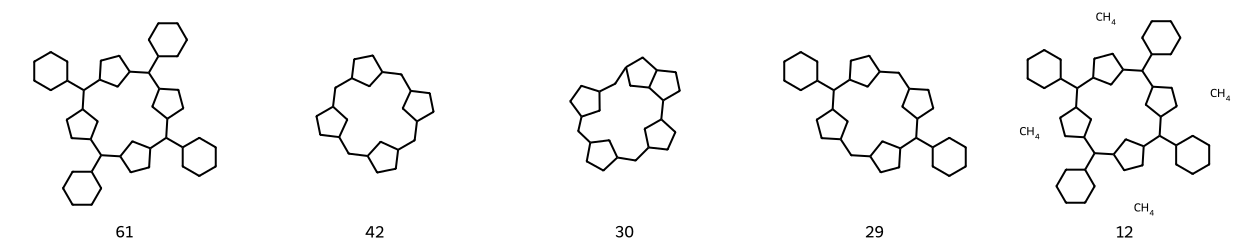

In [107]:
draw_top20Frequent(solution_Bemis,count_Bemis,List_Bemis_Murcko)

In [108]:
porph=porph_cleaned

# Machine Learning

In [109]:
# Mol objects of structures for similarity search (Mol notation conversion needed)
porph_mol=[]
for i in porph['Smiles']:
    mol = Chem.MolFromSmiles(i)
    porph_mol.append(mol)
porph['mol']= porph_mol
porph[0:3]

,index,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,activity_status,pIC$_5$$_0$,z_score,mol
0,16,CHEMBL268410,NaN,NaN,1279.63,NaN,NaN,7,CC1=C(C(COC(=O)C23C[C@H]4C[C@@H](C2)C[C@@H](C3...,IC50,...,J Med Chem,1992.00,NaN,NaN,NaN,NaN,pIC$_5$$_0$ active,5.30,-0.35,<rdkit.Chem.rdchem.Mol object at 0x000001BD391...
1,39,CHEMBL4741802,NaN,NaN,813.95,3.00,7.97,3a,CCCCCCOC(C)c1c(C)c2cc3nc(c(CC(=O)N[C@@H](CC(=O...,IC50,...,Eur J Med Chem,2020.00,CHEMBL3307651,TIME = 48.0 hr,NaN,NaN,pIC$_5$$_0$ inactive,3.75,-1.45,<rdkit.Chem.rdchem.Mol object at 0x000001BD391...
2,40,CHEMBL2111186,TALAPORFIN,3.00,711.77,3.00,5.95,Talaporfin,C=Cc1c(C)c2cc3nc(c(CC(=O)N[C@@H](CC(=O)O)C(=O)...,IC50,...,Eur J Med Chem,2020.00,CHEMBL3307762,TIME = 48.0 hr,NaN,NaN,pIC$_5$$_0$ inactive,4.85,-0.67,<rdkit.Chem.rdchem.Mol object at 0x000001BD391...


In [110]:
FP = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in porph.mol]
df_FP = pd.DataFrame(np.array(FP))
df_FP.head()

[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerator
[00:58:20] DEPRECATION WARNING: please use MorganGenerat

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
X=df_FP

In [112]:
# Assuming df_cleaned is your DataFrame and 'pIC50' is the target column
y = porph['pIC$_5$$_0$']  # Target variable
 # Features, dropping the target column

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [123]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_2, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models_2)

 57%|█████▋    | 24/42 [00:48<00:40,  2.24s/it]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 76%|███████▌  | 32/42 [00:51<00:05,  1.98it/s]

RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 253.


100%|██████████| 42/42 [00:58<00:00,  1.76it/s]

XGBRegressor model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 253, number of used features: 140
[LightGBM] [Info] Start training from score 5.798498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

100%|██████████| 42/42 [00:58<00:00,  1.40s/it]

                                             Adjusted R-Squared  \
Model                                                             
Lars                          100821860608669209757634002944.00   
LarsCV                              860234279722708254064640.00   
SGDRegressor                                   4783775823032.37   
KernelRidge                                                2.05   
GaussianProcessRegressor                                   1.91   
MLPRegressor                                               1.13   
LinearRegression                                           1.10   
TransformedTargetRegressor                                 1.10   
QuantileRegressor                                          1.07   
LassoLars                                                  1.07   
Lasso                                                      1.07   
DummyRegressor                                             1.07   
ElasticNet                                                 1.0

In [328]:
models_2

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,100821860608669209757634002944.00,-1537933461030652421508721278976.00,1896419890087486.00,0.34
LarsCV,860234279722708254064640.00,-13121986393865437747085312.00,5539435631086.85,3.25
SGDRegressor,4783775823032.37,-72971564538620.33,13062988.89,0.13
KernelRidge,2.05,-14.97,6.11,0.06
GaussianProcessRegressor,1.91,-12.91,5.70,0.12
MLPRegressor,1.13,-0.96,2.14,0.87
LinearRegression,1.10,-0.53,1.89,0.12
TransformedTargetRegressor,1.10,-0.53,1.89,2.56
QuantileRegressor,1.07,-0.01,1.53,0.53


In [370]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import TweedieRegressor
model =TweedieRegressor()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print mean R² score
print(f"Mean R² score from 5-fold CV: {scores.mean():.3f}")

Mean R² score from 5-fold CV: 0.215


# Classification (Active-Non_active)

In [388]:
y = porph['activity'] 

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# LazyPredict sınıflandırıcıyı başlat ve eğit
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Sonuçları yazdır
print(models)

100%|██████████| 32/32 [00:03<00:00,  8.13it/s]

[LightGBM] [Info] Number of positive: 165, number of negative: 88
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 253, number of used features: 144
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.652174 -> initscore=0.628609
[LightGBM] [Info] Start training from score 0.628609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [329]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,0.81,0.80,NaN,0.82,0.04
LogisticRegression,0.83,0.80,0.80,0.83,0.05
ExtraTreesClassifier,0.80,0.77,0.77,0.80,0.26
KNeighborsClassifier,0.72,0.77,0.77,0.73,0.04
RandomForestClassifier,0.81,0.77,0.77,0.81,0.30
PassiveAggressiveClassifier,0.78,0.76,NaN,0.79,0.05
NearestCentroid,0.69,0.75,0.75,0.70,0.08
BernoulliNB,0.66,0.71,NaN,0.67,0.04
BaggingClassifier,0.75,0.71,0.71,0.75,0.21


In [391]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Output the results
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

Cross-Validation Scores: [0.796875   0.671875   0.79365079 0.74603175 0.6031746 ]
Mean Score: 0.7223214285714286


In [392]:
model = LogisticRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Output results
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

Cross-Validation Scores: [0.75       0.65625    0.74603175 0.6984127  0.6031746 ]
Mean Score: 0.6907738095238096


[(0.0, 1.0)]

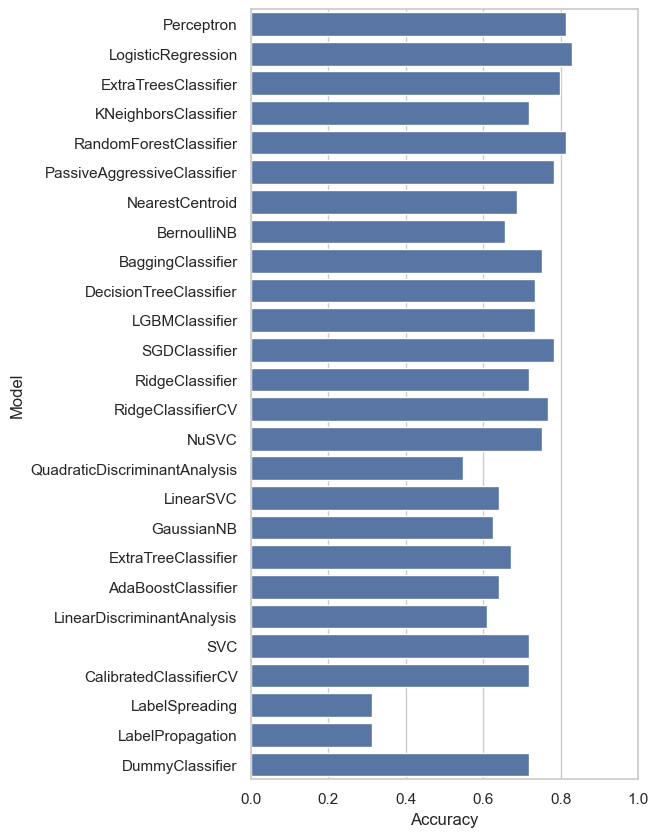

In [129]:
# 
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

# TUMOR RESPONSE

In [113]:
porph = pd.read_csv('porphyrin.csv')

In [114]:
t_res=porph[(porph['Standard Type']== 'Tumor response') | (porph['Standard Type']=='Tumor cure')]

In [115]:
t_res=t_res[~t_res.duplicated(['Molecule ChEMBL ID', 'Document ChEMBL ID'], keep=False)]
t_res['Standard Value'].fillna(0, inplace = True)

In [116]:
t_res.sort_values(by=['Standard Value'], ascending=False, inplace=True)

In [117]:
len(t_res)

11

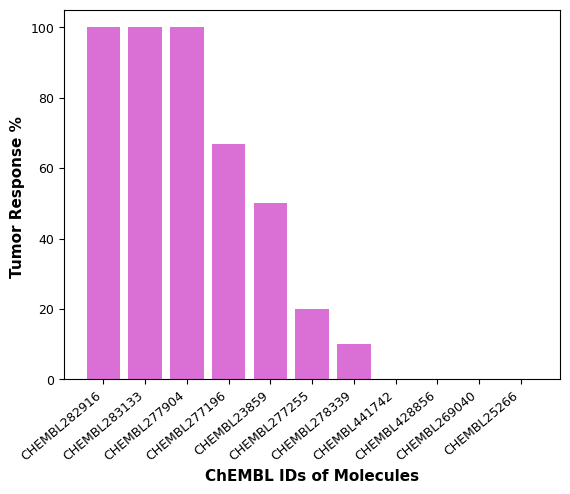

In [118]:
x=plt.bar(t_res['Molecule ChEMBL ID'], t_res['Standard Value'], align='center',color ="#DA70D6"
)
plt.xticks(rotation=40,fontsize='9',horizontalalignment='right')
plt.yticks(fontsize='9')
plt.xlabel('ChEMBL IDs of Molecules', fontweight='bold', color='black',
   fontsize='11', horizontalalignment='center')
plt.ylabel('Tumor Response % ', fontweight='bold', color='black',
   fontsize='11', horizontalalignment='center')
plt.savefig('tumor_resp.png', dpi=600)
plt.grid(False);

In [213]:

tres_mol=[]
for i in t_res['Smiles']:
    mol = Chem.MolFromSmiles(i)
    tres_mol.append(mol)


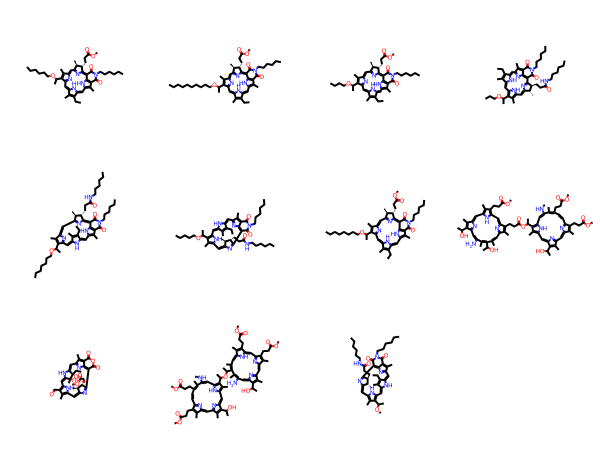

In [232]:
Draw.MolsToGridImage(tres_mol,molsPerRow=4,subImgSize=(150,150))

In [322]:
freq1=tres_mol[4]
rdDepictor.Compute2DCoords(freq1)

0

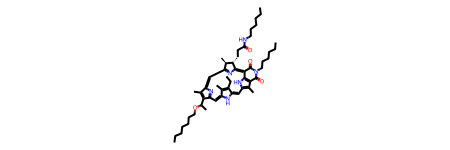

In [325]:
freq1

In [326]:
img = Draw.MolToImage(freq1, size=(300, 300)) 

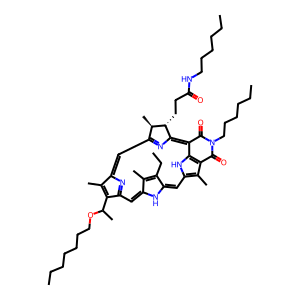

In [327]:
img